# Network generation and node properties

In [6]:

%matplotlib inline 
import os, sys
import json
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import scipy
import matplotlib.pyplot as plt


def Network_Analysis(df):
    # Create an empty graph
    G = nx.Graph()
    G = nx.from_pandas_edgelist(df, 'source', 'target')

    
    # NODE PROPERTIES---------------------------------------------------------------
    # node degree
    degrees = nx.degree(G)

    # node betweenness centrality
    betweenness = nx.betweenness_centrality(G)

    # node clustering coeff
    clustering_coefficients = nx.clustering(G)

    # set node attributes
    degree_dict = dict(G.degree())    
    nx.set_node_attributes(G, degree_dict, 'degree')
    nx.set_node_attributes(G, betweenness, 'betweenness')
    nx.set_node_attributes(G, clustering_coefficients, 'clustering_coefficients')


    # GRAPH PROPERTIES---------------------------------------------------------------
    # graph diameter through each component since graph is not connected
    diameters = []
    for component in nx.connected_components(G):
        subgraph = G.subgraph(component)
        diameters.append(nx.diameter(subgraph))

    # diameter of the entire graph as the maximum of the component diameters
    diameter = max(diameters)

    #graph radius
    radius = diameter / 2

    # graph density
    density = nx.density(G)

    # graph clustering coefficient
    clustering = nx.average_clustering(G)

    for node, clustering_coefficient in clustering_coefficients.items():
        print(f"Node {node}: Clustering coefficient = {clustering_coefficient}")
    
    
    # Largest connected component size
    largest_cc = max(nx.connected_components(G), key=len)
    largest_cc_size = len(largest_cc)
    print(f"The size of the largest connected component is {largest_cc_size}")


    print('Graph diameter:', diameter)
    print('Graph radius:', radius)
    print('Graph density:', density)
    print('Graph clustering coefficient:', clustering)

    # Export to Gexf file.

    if counter==0:
        #Export to first gexf file
        nx.write_gexf(G, 'Network_scientist_coauthorships.gexf')
        print("Network_scientist_coauthorships.gexf created")

    else:
        #Export to second gexf file
        nx.write_gexf(G, 'Game_of_thrones_coappearences.gexf')
        print("Game_of_thrones_coappearences.gexf")
    

    return G


#MAIN PROGRAM
# Counter to export datasets in different gexf files and not overwrite one file
counter=0
# Read Network_scientist_coauthorships dataset in a CSV file
print('Network Analysis for Network_scientist_coauthorships:')
print('------------------------------------------------------------------------------------------------------------------------------')


# First 2500 dataset values only, since more than them causes lag in output
df = pd.read_csv('Network_scientist_coauthorships.csv')
df = df.head(2500)
G=Network_Analysis(df)
counter+=1

# Read Game of thrones coappearences dataset in a CSV file

print('Game of Thrones actors coappearences')
print('------------------------------------------------------------------------------------------------------------------------------')

# First 2500 dataset values only, since more than them causes lag in output
df = pd.read_csv('stormofswords.csv')
df = df.head(2500)
G=Network_Analysis(df)




Network Analysis for Network_scientist_coauthorships:
------------------------------------------------------------------------------------------------------------------------------
Node 0: Clustering coefficient = 1.0
Node 1: Clustering coefficient = 1.0
Node 2: Clustering coefficient = 1.0
Node 3: Clustering coefficient = 0.5333333333333333
Node 4: Clustering coefficient = 0.011614401858304297
Node 5: Clustering coefficient = 0.0784313725490196
Node 6: Clustering coefficient = 0.03968253968253968
Node 7: Clustering coefficient = 0.42857142857142855
Node 34714: Clustering coefficient = 1.0
Node 43173: Clustering coefficient = 1.0
Node 2876: Clustering coefficient = 0
Node 2877: Clustering coefficient = 0
Node 8815: Clustering coefficient = 0
Node 8816: Clustering coefficient = 0
Node 8817: Clustering coefficient = 0
Node 8818: Clustering coefficient = 0
Node 12157: Clustering coefficient = 0
Node 5115: Clustering coefficient = 0
Node 13185: Clustering coefficient = 0
Node 13186: Cluste

### Plot degree distribution

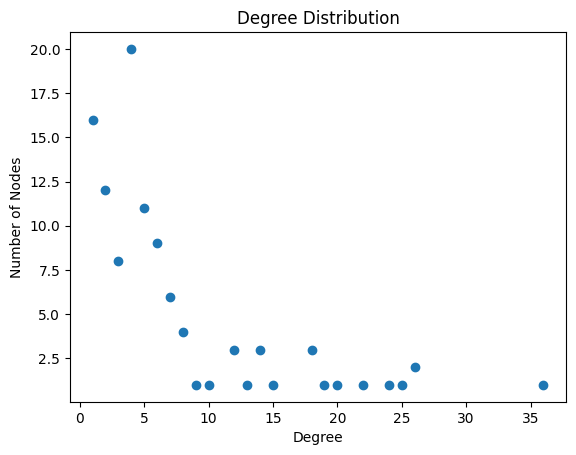

In [7]:
# compute the degrees of each node
degrees = dict(nx.degree(G))

# count the number of nodes with each degree
degree_counts = {}
for degree in degrees.values():
    if degree not in degree_counts:
        degree_counts[degree] = 0
    degree_counts[degree] += 1

# create a bar plot of the degree distribution
plt.scatter(degree_counts.keys(), degree_counts.values())

# set the labels and title
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')

# show the plot
plt.show()

### Assortativeness analysis

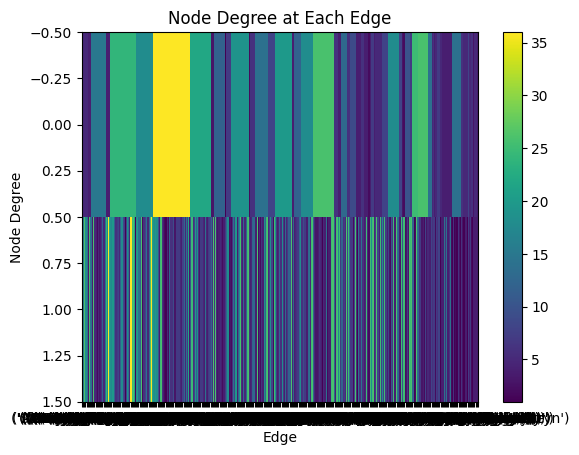

the value of r=  -0.1307696836693023
The graph seems dissassortative, Since the value of assortative coefficient is smaller than 0


In [8]:
import numpy as np

edge_degrees = np.zeros((G.number_of_edges(), 2))

for i, edge in enumerate(G.edges()):
    edge_degrees[i][0] = degrees[edge[0]]
    edge_degrees[i][1] = degrees[edge[1]]

plt.imshow(edge_degrees.T, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(G.number_of_edges()), G.edges())
plt.xlabel('Edge')
plt.ylabel('Node Degree')
plt.title('Node Degree at Each Edge')
plt.show()

# Convert node degrees to a dictionary
deg_dict = dict(nx.degree(G))

# Compute assortativity coefficient
r = nx.degree_assortativity_coefficient(G, deg_dict)

print("the value of r= ",r)

if(r<0):
    print('The graph seems dissassortative, Since the value of assortative coefficient is smaller than 0')
    
else:
    print('The graph seems more inclined towards assertiveness since the value of r is greater than 0')